## Create data for unit testing of `solardatatools.signal_decompositions`
## Test module `test_signal_decompositions`

## `l2_l1d1_l2d2p365`

Components:
- l2: gaussian noise, sum-of-squares small or l2-norm squared
- l1d1: piecewise constant heuristic, l1-norm of first order differences
- l2d2p365: small second order diffs (smooth) and 365-periodic

Tests:
- test_l2_l1d1_l2d2p365_default
- test_l2_l1d1_l2d2p365_tv_weights
- ~~test_l2_l1d1_l2d2p365_residual_weights~~
- test_l2_l1d1_l2d2p365_transition
- test_l2_l1d1_l2d2p365_transition_wrong
- test_l2_l1d1_l2d2p365_default_long
- test_l2_l1d1_l2d2p365_idx_select
- test_l2_l1d1_l2d2p365_yearly_periodic
- ~~test_l2_l1d1_l2d2p365_seas_max~~

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
import random
import json

from utils import plot_decomp
from solardatatools import signal_decompositions as sd

np.random.seed(12) 
random.seed(10)

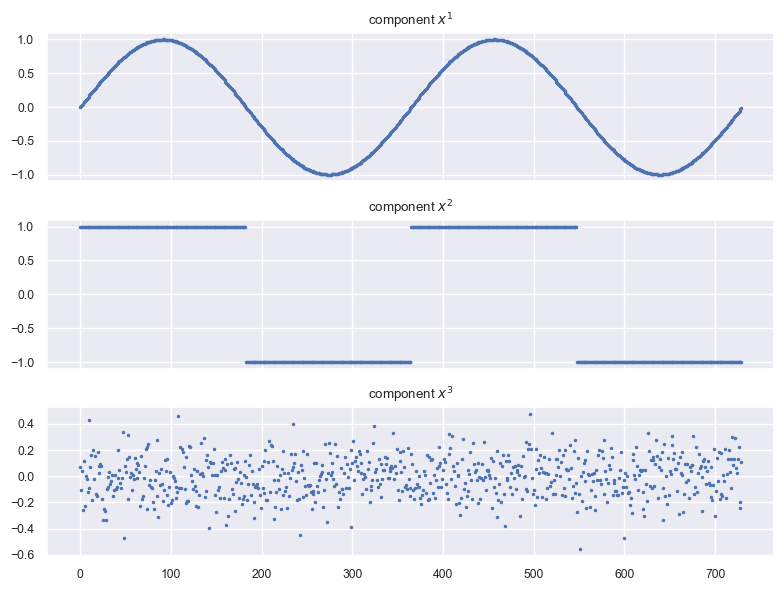

In [2]:
# Full length test signal used for this function l2_l1d1_l2d2p365
t = np.arange(365*2)

signal1 = np.sin(2 * np.pi * t * 1 / (365.))  
signal2 = signal.square(2 * np.pi * t * 1 / (365.)) 
signal3 = 0.15 * np.random.randn(len(signal1))

X_real = np.zeros((3, len(t)), dtype=float)
X_real[0] = signal1
X_real[1] = signal2
X_real[2] = signal3
y = np.sum(X_real, axis=0)

plot_decomp(X_real)

### `test_l2_l1d1_l2d2p365_default`

In [3]:
# # Take signal <365 for first few tests
signal_365 = y[:365]
X_real_365 = [x[:365] for x in X_real]

In [4]:
input_dict = {
    "test_signal": list(signal_365)
}

with open("test_l2_l1d1_l2d2p365_default_input.json", "w") as outfile:
    json.dump(input_dict, outfile)

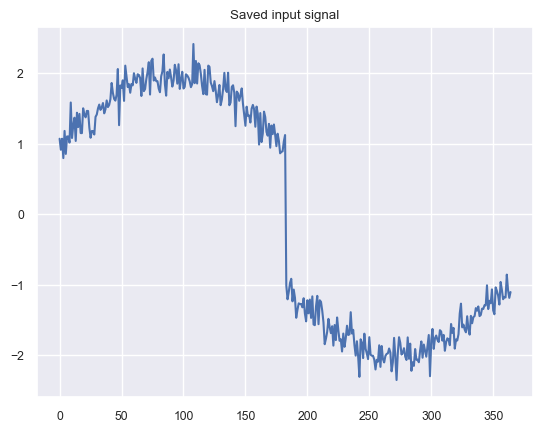

In [5]:
plt.plot(signal_365);
plt.title("Saved input signal");

### Note: 
For this function, adjusted c1 from 10 (default) to 2 

### save output

In [8]:
s_hat, s_seas, s_error, obj_val = sd.l2_l1d1_l2d2p365(signal_365, c1=2, solver = "MOSEK", return_obj=True)

output_dict = {
    "expected_s_hat_mosek_365": list(s_hat),
    "expected_s_seas_mosek_365": list(s_seas),
    "expected_obj_val_mosek_365": obj_val
}

with open("test_l2_l1d1_l2d2p365_default_output.json", "w") as outfile:
    json.dump(output_dict, outfile)

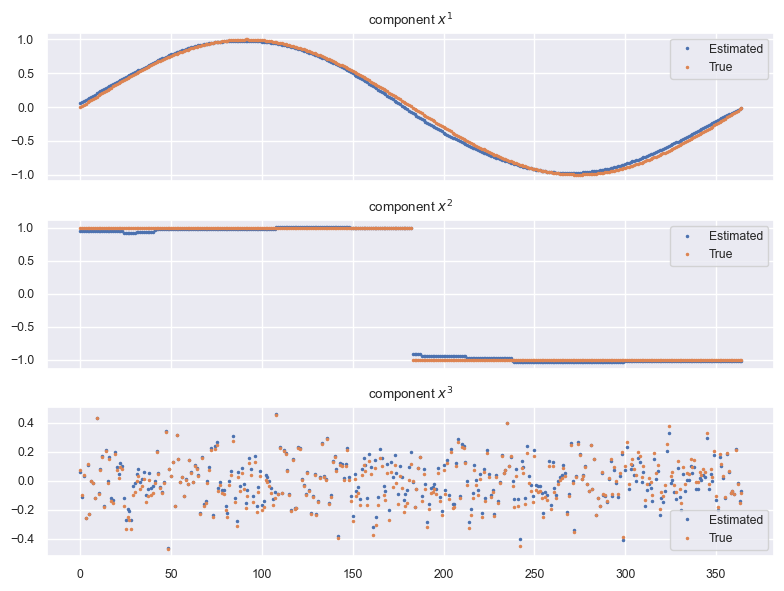

In [9]:
plot_decomp([s_seas, s_hat, s_error], X_real_365)

### Decomposition wih default arg c1=10 (not used in test)

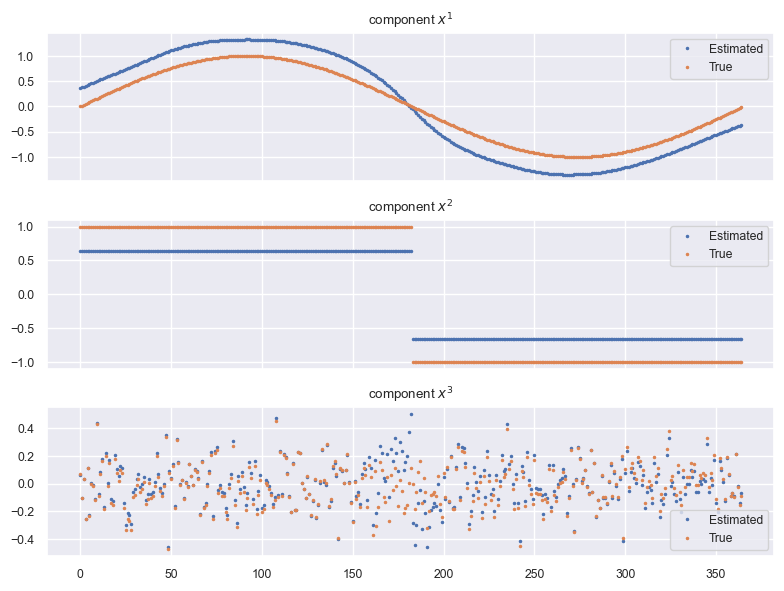

In [10]:
s_hat, s_seas, s_error, obj_val = sd.l2_l1d1_l2d2p365(signal_365, c1=10, solver = "MOSEK", return_obj=True)

# with c1=10
plot_decomp([s_seas, s_hat, s_error], X_real_365)

### `test_l2_l1d1_l2d2p365_tv_weights` 

TODO: generate more reasonable weights

In [11]:
# Generate random weights 
rand_tv_weights = np.random.uniform(1, 2, len(signal_365)-1).round(7)

input_dict = {
    "test_signal": list(signal_365),
    "rand_tv_weights_365": list(rand_tv_weights)
}

with open("test_l2_l1d1_l2d2p365_tv_weights_input.json", "w") as outfile:
    json.dump(input_dict, outfile)

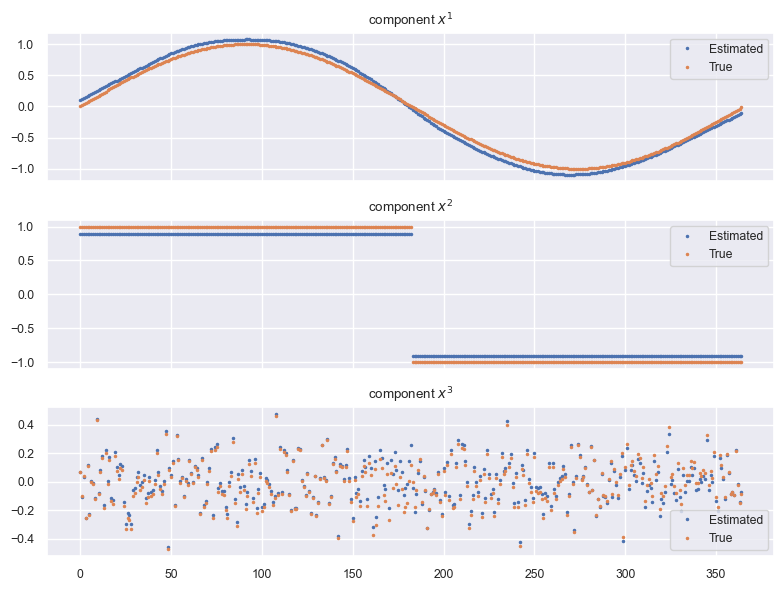

In [12]:
# Pass tv_weights to function
s_hat, s_seas, s_error, obj_val = sd.l2_l1d1_l2d2p365(signal_365, c1=2.5, solver = "MOSEK", return_obj=True, 
                                             tv_weights=rand_tv_weights)

output_dict = {
    "expected_s_hat_mosek_tvw_365": list(s_hat),
    "expected_s_seas_mosek_tvw_365": list(s_seas),
    "expected_obj_val_mosek_tvw_365": obj_val
}

with open("test_l2_l1d1_l2d2p365_tv_weights_output.json", "w") as outfile:
    json.dump(output_dict, outfile)
    
plot_decomp([s_seas, s_hat, s_error], X_real_365)

### `test_l2_l1d1_l2d2p365_transition`

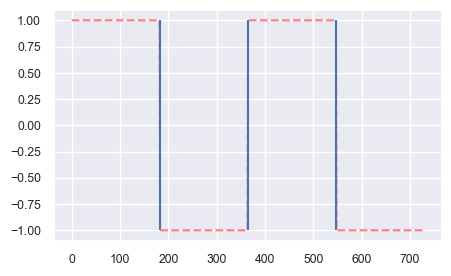

In [13]:
# get indices of piecewise fn transitions
plt.figure(figsize=(5,3))
plt.plot(signal2, linestyle="--", alpha=0.5,  color="red")
plt.vlines(182, -1, 1)
plt.vlines(364, -1, 1)
plt.vlines(547, -1, 1);

In [14]:
idx = [182] # only up to index 365 since not taking the full signal in this test (len(signal)<365)

input_dict = {
    "test_signal": list(signal_365),
    "indices": list(idx)
}

with open("test_l2_l1d1_l2d2p365_transition_input.json", "w") as outfile:
    json.dump(input_dict, outfile)

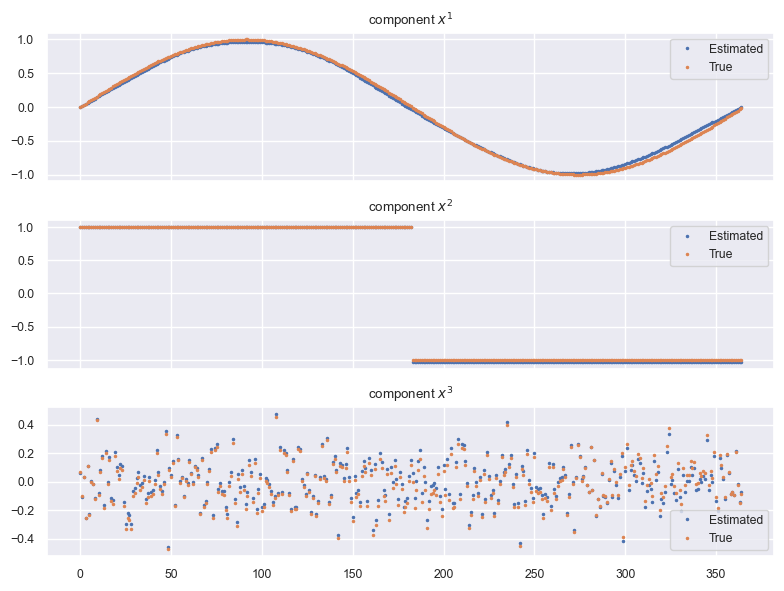

In [15]:
s_hat, s_seas, s_error, obj_val = sd.l2_l1d1_l2d2p365(signal_365, solver = "MOSEK", transition_locs=idx, return_obj=True)

output_dict = {
    "expected_s_hat_mosek_transition_365": list(s_hat),
    "expected_s_seas_mosek_transition_365": list(s_seas),
    "expected_obj_val_mosek_transition_365": obj_val
}

with open("test_l2_l1d1_l2d2p365_transition_output.json", "w") as outfile:
    json.dump(output_dict, outfile)
    
plot_decomp([s_seas, s_hat, s_error], X_real_365)

### `test_l2_l1d1_l2d2p365_transition_wrong`

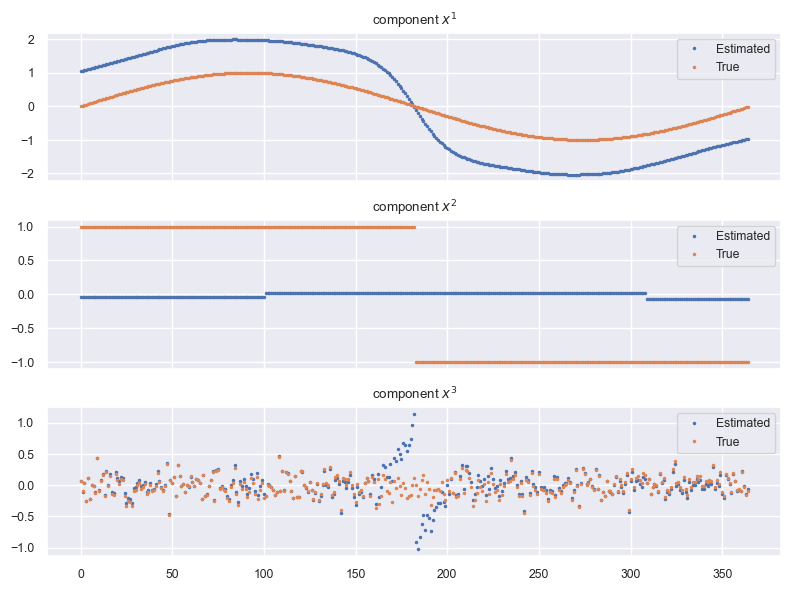

In [16]:
## input
idx_wrong = [100, 308] # random 

input_dict = {
    "test_signal": list(signal_365),
    "indices": list(idx_wrong)
}

with open("test_l2_l1d1_l2d2p365_transition_wrong_input.json", "w") as outfile:
    json.dump(input_dict, outfile)
    

## output
s_hat, s_seas, s_error, obj_val = sd.l2_l1d1_l2d2p365(signal_365, solver = "MOSEK", transition_locs=idx_wrong, return_obj=True)

output_dict = {
    "expected_s_hat_mosek_transition_wrong_365": list(s_hat),
    "expected_s_seas_mosek_transition_wrong_365": list(s_seas),
    "expected_obj_val_mosek_transition_wrong_365": obj_val
}

with open("test_l2_l1d1_l2d2p365_transition_wrong_output.json", "w") as outfile:
    json.dump(output_dict, outfile)
    
plot_decomp([s_seas, s_hat, s_error], X_real_365)

### `test_l2_l1d1_l2d2p365_default_long`

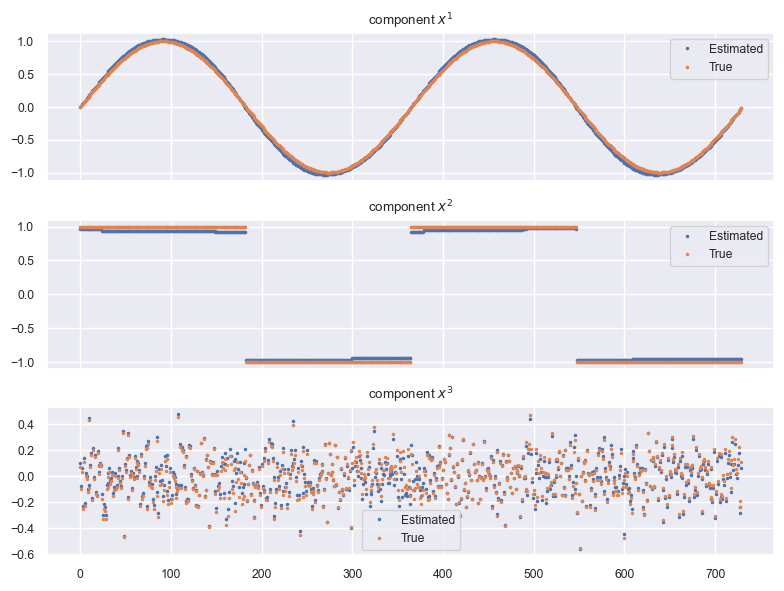

In [17]:
# taking full length signal
signal_730 = y

## input
input_dict = {
    "test_signal": list(signal_730)
}

with open("test_l2_l1d1_l2d2p365_default_long_input.json", "w") as outfile:
    json.dump(input_dict, outfile)

## output
s_hat, s_seas, s_error, obj_val = sd.l2_l1d1_l2d2p365(signal_730, c1=2, solver = "MOSEK", return_obj=True)


output_dict = {
    "expected_s_hat_mosek": list(s_hat),
    "expected_s_seas_mosek": list(s_seas),
    "expected_obj_val_mosek": obj_val
}

with open("test_l2_l1d1_l2d2p365_default_long_output.json", "w") as outfile:
    json.dump(output_dict, outfile)

plot_decomp([s_seas, s_hat, s_error], X_real)

### `test_l2_l1d1_l2d2p365_idx_select`

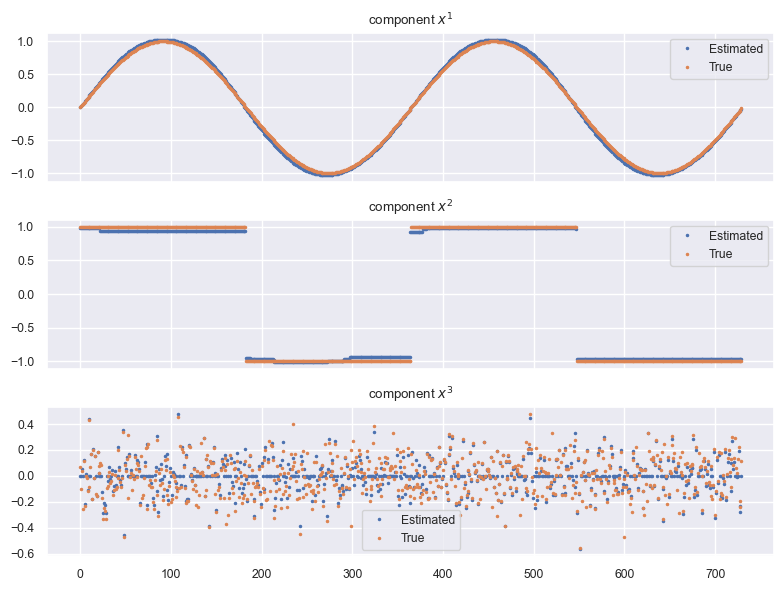

In [18]:
# Take a random set of 500 indices
rand_set = random.sample(range(0, 730), 500)
indices = [True if i in rand_set else False for i in range(len(signal_730))]

## input
input_dict = {
    "test_signal": list(signal_730),
    "indices": list(indices)
}

with open("test_l2_l1d1_l2d2p365_idx_select_input.json", "w") as outfile:
    json.dump(input_dict, outfile)
    
    
## output
s_hat, s_seas, s_error, obj_val = sd.l2_l1d1_l2d2p365(signal_730, c1=2, solver = "MOSEK", use_ixs=indices, return_obj=True)

output_dict = {
    "expected_s_hat_mosek_ixs": list(s_hat),
    "expected_s_seas_mosek_ixs": list(s_seas),
    "expected_obj_val_mosek_ixs": obj_val
}

with open("test_l2_l1d1_l2d2p365_idx_select_output.json", "w") as outfile:
    json.dump(output_dict, outfile)

plot_decomp([s_seas, s_hat, s_error], X_real)

### `test_l2_l1d1_l2d2p365_yearly_periodic`

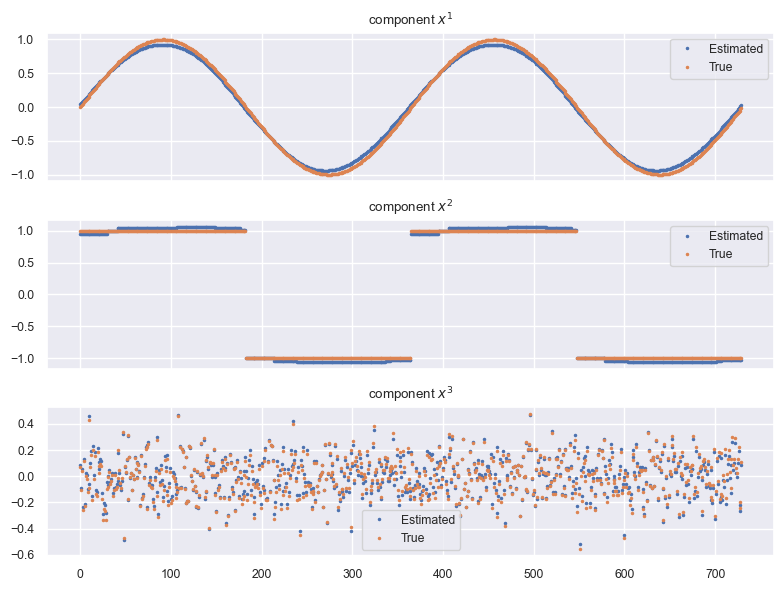

In [19]:
# yearly periodic constraint, len has to be >365

## input
input_dict = {
    "test_signal": list(signal_730)
}

with open("test_l2_l1d1_l2d2p365_yearly_periodic_input.json", "w") as outfile:
    json.dump(input_dict, outfile)


s_hat, s_seas, s_error, obj_val = sd.l2_l1d1_l2d2p365(signal_730,  c1=1, solver = "MOSEK", yearly_periodic=True, return_obj=True)

output_dict = {
    "expected_s_hat_mosek_yearly_periodic": list(s_hat),
    "expected_s_seas_mosek_yearly_periodic": list(s_seas),
    "expected_obj_val_mosek_yearly_periodic": obj_val
}

with open("test_l2_l1d1_l2d2p365_yearly_periodic_output.json", "w") as outfile:
    json.dump(output_dict, outfile)

plot_decomp([s_seas, s_hat, s_error], X_real)

# ------------------------------------------------------------

## `l1_l2d2p365`

Components:
- l1: laplacian noise, sum-of-absolute values or l1-norm
- l2d2p365: small second order diffs (smooth) and 365-periodic

Tests:
- test_l1_l2d2p365_default
- test_l1_l2d2p365_idx_select
- test_l1_l2d2p365_long_not_yearly_periodic

In [19]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
import random
import json

from utils import plot_decomp
from solardatatools import signal_decompositions as sd

np.random.seed(12) 
random.seed(10)

In [2]:
t = np.arange(365*2)

# seasonal periodic
signal1 = np.sin(2 * np.pi * t * 1 / (365.))
X_real = np.zeros((2, len(t)), dtype=float)
# laplacian noise
signal2 = 0.15 * np.random.laplace(0, 1, len(signal1))

X_real[0] = signal1
X_real[1] = signal2

y = np.sum(X_real, axis=0)

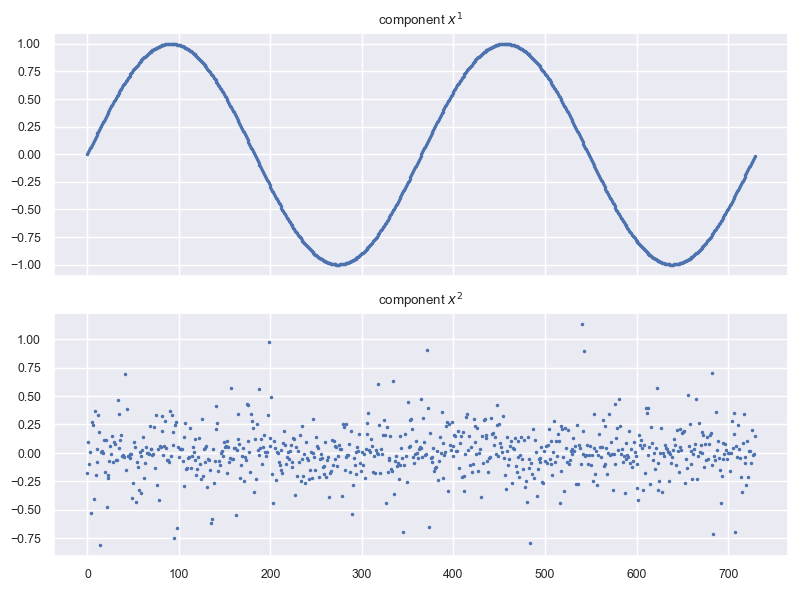

In [3]:
plot_decomp(X_real)

### `test_l1_l2d2p365_default`

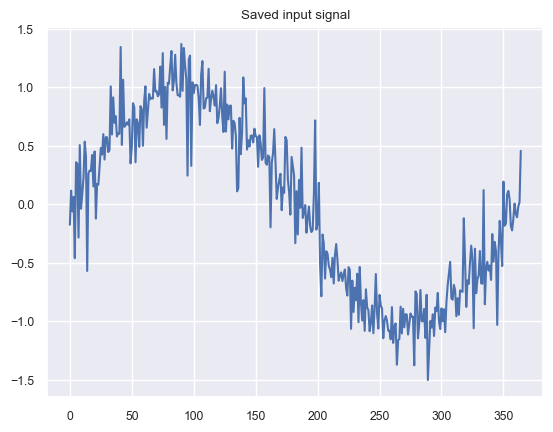

In [4]:
# Take signal <365 for this test
signal_365 = y[:365]
X_real_365 = [x[:365] for x in X_real]
input_dict = {
    "test_signal": list(signal_365)
}

with open("test_l1_l2d2p365_default_input.json", "w") as outfile:
    json.dump(input_dict, outfile)

plt.plot(signal_365);
plt.title("Saved input signal");

### Save output

In [5]:
s_seas, obj_val = sd.l1_l2d2p365(signal_365, solver = "MOSEK", return_obj=True)

output_dict = {
    "expected_s_seas_mosek_365": list(s_seas),
    "expected_obj_val_mosek_365": obj_val
}

with open("test_l1_l2d2p365_default_output.json", "w") as outfile:
    json.dump(output_dict, outfile)

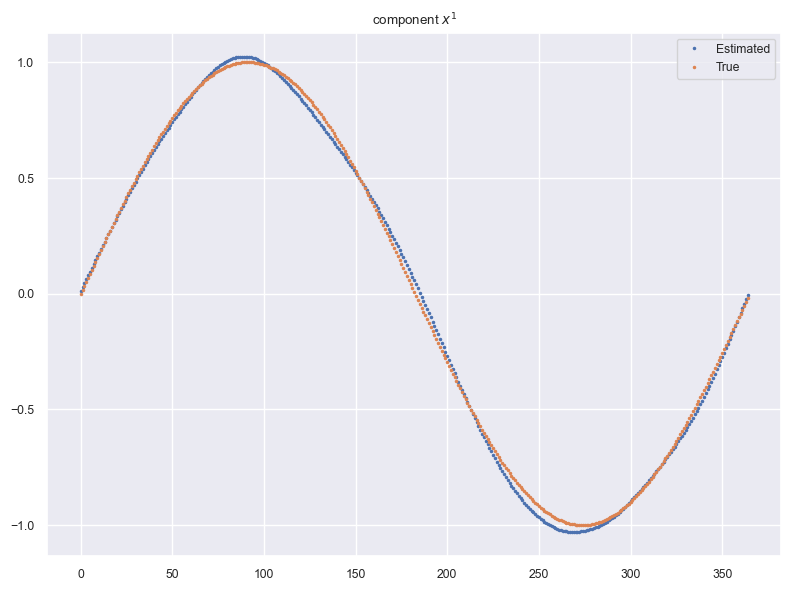

In [6]:
plot_decomp([s_seas], X_real_365)

### `test_l1_l2d2p365_idx_select`

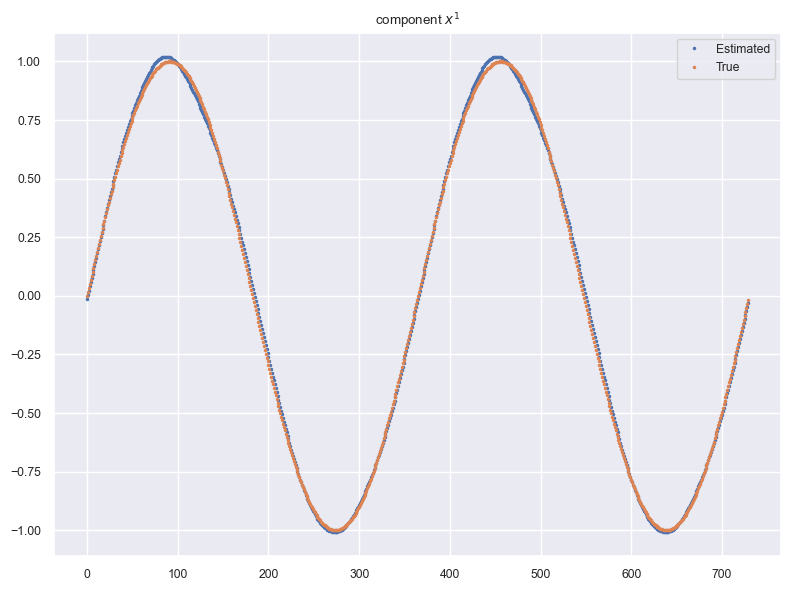

In [7]:
# taking full length signal
signal_730 = y

# Take a random set of 500 indices
rand_set = random.sample(range(0, 730), 500)
indices = [True if i in rand_set else False for i in range(len(signal_730))]

## input
input_dict = {
    "test_signal": list(signal_730),
    "indices": list(indices)
}

with open("test_l1_l2d2p365_idx_select_input.json", "w") as outfile:
    json.dump(input_dict, outfile)
    
    
    
    
    
s_seas, obj_val = sd.l1_l2d2p365(signal_730, solver = "MOSEK", c1=1000, use_ixs=indices, return_obj=True)
output_dict = {
    "expected_s_seas_mosek_ixs": list(s_seas),
    "expected_obj_val_mosek_ixs": obj_val
}
with open("test_l1_l2d2p365_idx_select_output.json", "w") as outfile:
    json.dump(output_dict, outfile)

plot_decomp([s_seas], [X_real[0]])

### test_l1_l2d2p365_long_not_yearly_periodic

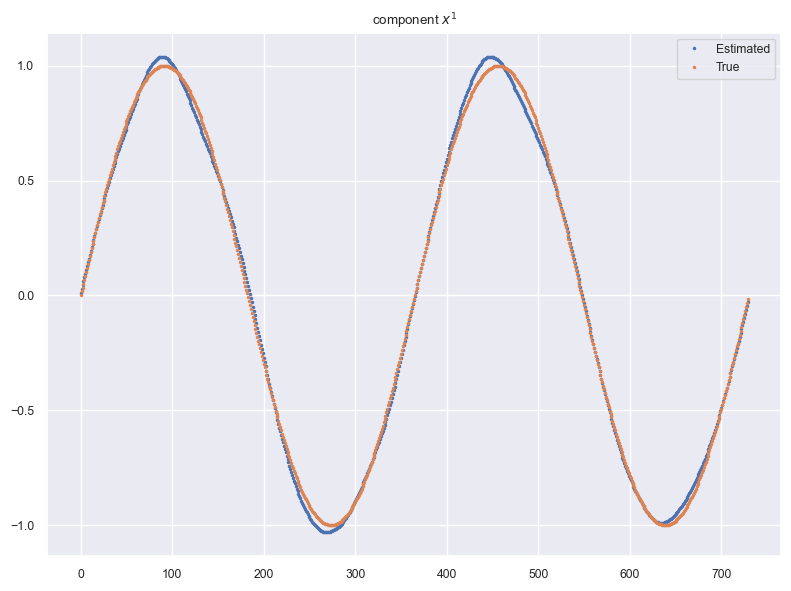

In [8]:
# yearly periodic constraint, len has to be >365

## input
input_dict = {
    "test_signal": list(signal_730)
}

with open("test_l1_l2d2p365_long_not_yearly_periodic_input.json", "w") as outfile:
    json.dump(input_dict, outfile)


s_seas, obj_val = sd.l1_l2d2p365(signal_730, solver = "MOSEK", yearly_periodic=False, return_obj=True)

output_dict = {
    "expected_s_seas_mosek_yearly_periodic": list(s_seas),
    "expected_obj_val_mosek_yearly_periodic": obj_val
}

with open("test_l1_l2d2p365_long_not_yearly_periodic_output.json", "w") as outfile:
    json.dump(output_dict, outfile)

plot_decomp([s_seas], [X_real[0]])

# ------------------------------------------------------------


## `tl1_l2d2p365`

Components:

- tl1: 'tilted l1-norm,' also known as quantile cost function
- l2d2p365: small second order diffs (smooth) and 365-periodic

Tests:
- test_tl1_l2d2p365_default
- test_tl1_l2d2p365_idx_select
- test_tl1_l2d2p365_long_not_yearly_periodic

In [12]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
from scipy.stats import laplace_asymmetric
import random
import json

from utils import plot_decomp
from solardatatools import signal_decompositions as sd

np.random.seed(12) 
random.seed(10)

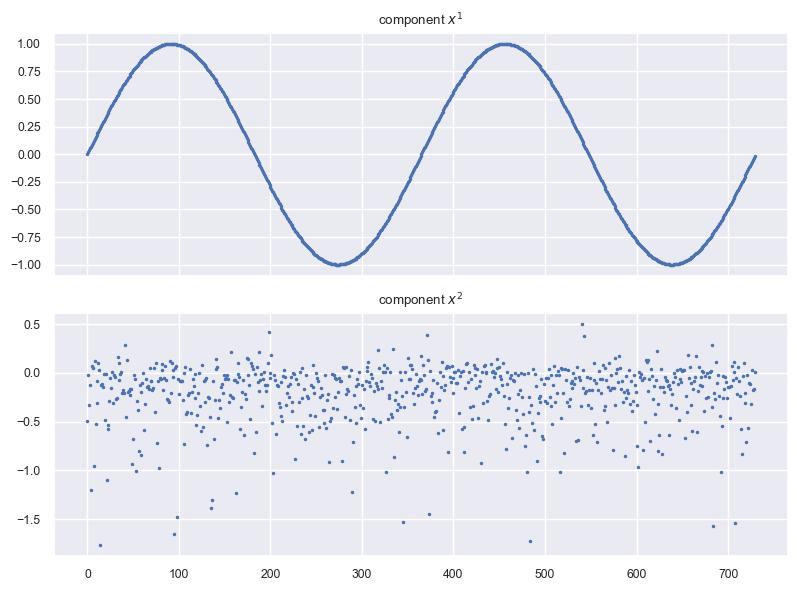

In [2]:
t = np.arange(365*2)

# seasonal periodic
signal1 = np.sin(2 * np.pi * t * 1 / (365.))
# asymmetric laplacian noise
kappa = 2 # k>0, k=1 is laplace
signal2 = 0.15 * laplace_asymmetric.rvs(kappa, size=len(signal1))

X_real = np.zeros((2, len(t)), dtype=float)
X_real[0] = signal1
X_real[1] = signal2

y = np.sum(X_real, axis=0)
plot_decomp(X_real)

(array([  5.,   4.,   5.,  16.,  38.,  77., 171., 324.,  84.,   6.]),
 array([-1.76087584, -1.53489194, -1.30890805, -1.08292415, -0.85694026,
        -0.63095637, -0.40497247, -0.17898858,  0.04699532,  0.27297921,
         0.49896311]),
 <BarContainer object of 10 artists>)

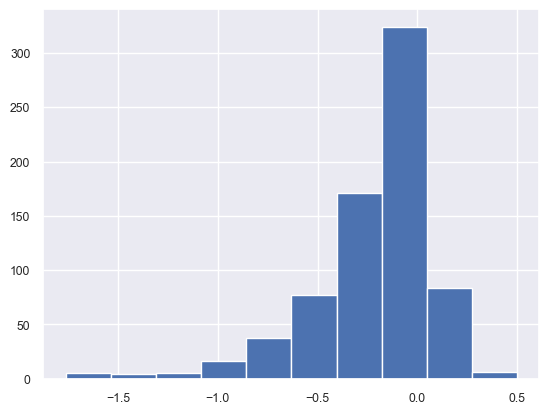

In [3]:
plt.hist(signal2)

In [4]:
np.quantile(signal2, 0.8) 

0.006092775222533824

#### -> switch to tau=0.8

### `test_tl1_l2d2p365_default`

In [5]:
# Take signal <365 
signal_365 = y[:365]
X_real_365 = [x[:365] for x in X_real]


input_dict = {
    "test_signal": list(signal_365)
}

with open("test_tl1_l2d2p365_default_input.json", "w") as outfile:
    json.dump(input_dict, outfile)

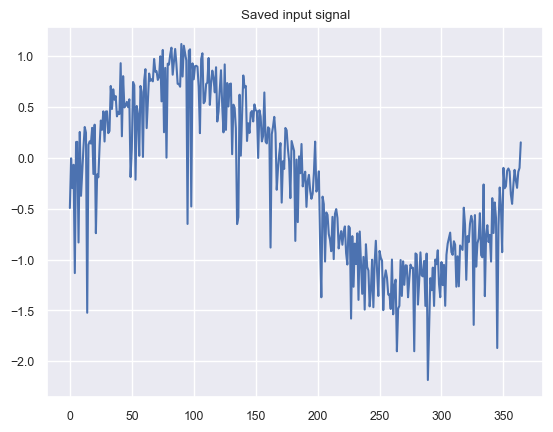

In [6]:
plt.plot(signal_365);
plt.title("Saved input signal");

### Save output

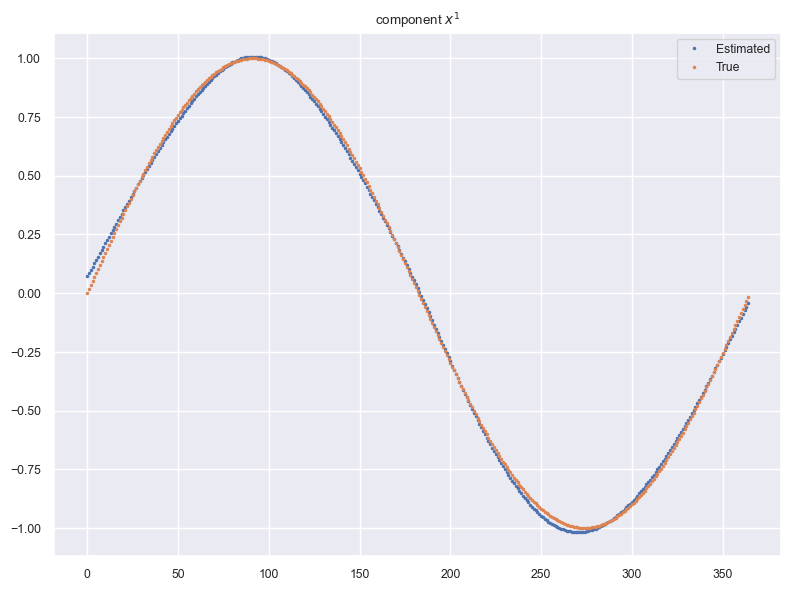

In [7]:
s_seas, obj_val = sd.tl1_l2d2p365(signal_365, tau=0.8, solver = "MOSEK", return_obj=True)

output_dict = {
    "expected_s_seas_mosek_365": list(s_seas),
    "expected_obj_val_mosek_365": obj_val
}

with open("test_tl1_l2d2p365_default_output.json", "w") as outfile:
    json.dump(output_dict, outfile)
    
plot_decomp([s_seas], [X_real_365[0]])

### `test_tl1_l2d2p365_idx_select`

In [8]:
# taking full length signal
signal_730 = y

# Take a random set of 500 indices
rand_set = random.sample(range(0, 730), 500)
indices = [True if i in rand_set else False for i in range(len(signal_730))]

## input
input_dict = {
    "test_signal": list(signal_730),
    "indices": list(indices)
}

with open("test_tl1_l2d2p365_idx_select_input.json", "w") as outfile:
    json.dump(input_dict, outfile)

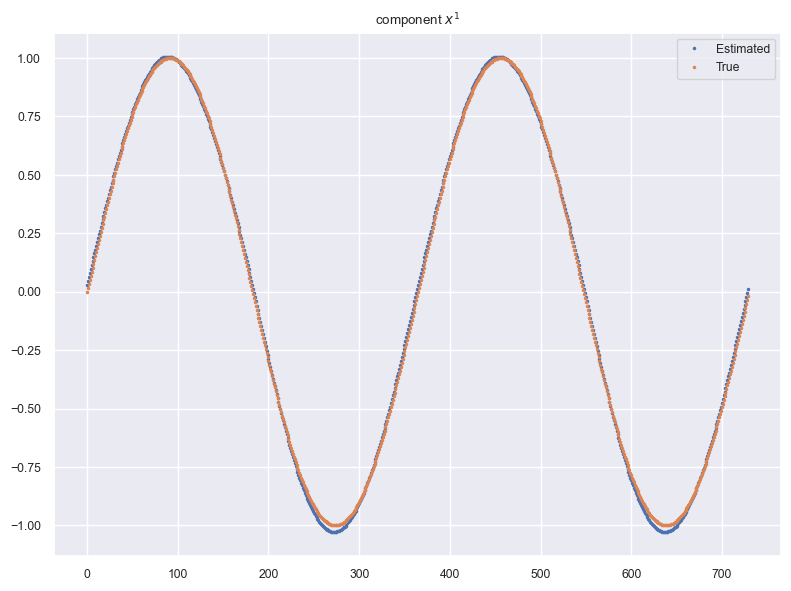

In [9]:
s_seas, obj_val = sd.tl1_l2d2p365(signal_730, tau=0.8, solver = "MOSEK", use_ixs=indices, return_obj=True)

output_dict = {
    "expected_s_seas_mosek_ixs": list(s_seas),
    "expected_obj_val_mosek_ixs": obj_val
}
with open("test_tl1_l2d2p365_idx_select_output.json", "w") as outfile:
    json.dump(output_dict, outfile)

plot_decomp([s_seas], [X_real[0]])

### `test_tl1_l2d2p365_long_not_yearly_periodic`

In [12]:
## input
input_dict = {
    "test_signal": list(signal_730)
}

with open("test_tl1_l2d2p365_long_not_yearly_periodic_input.json", "w") as outfile:
    json.dump(input_dict, outfile)

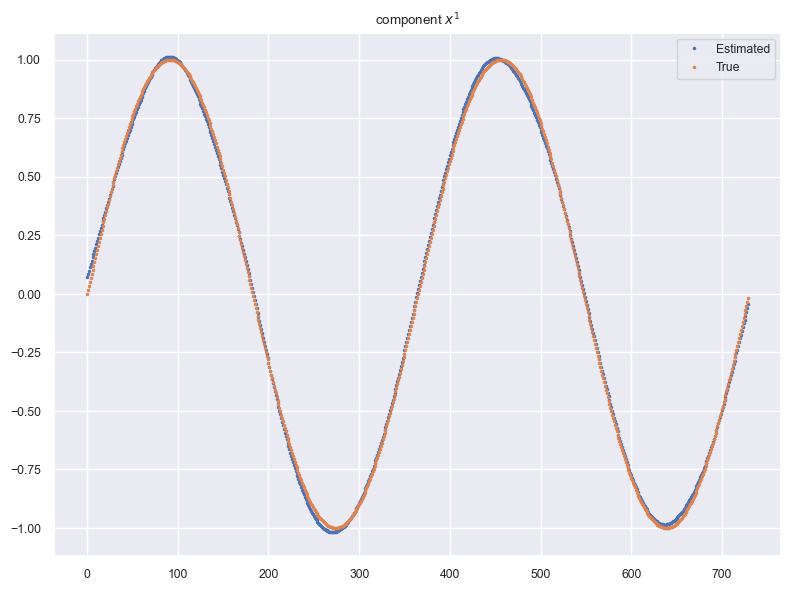

In [13]:
# yearly periodic and >365
s_seas, obj_val = sd.tl1_l2d2p365(signal_730, solver = "MOSEK", tau=0.8, yearly_periodic=False, return_obj=True)

output_dict = {
    "expected_s_seas_mosek_yearly_periodic": list(s_seas),
    "expected_obj_val_mosek_yearly_periodic": obj_val
}

with open("test_tl1_l2d2p365_long_not_yearly_periodic_output.json", "w") as outfile:
    json.dump(output_dict, outfile)

plot_decomp([s_seas], [X_real[0]])

# ------------------------------------------------------------


## `tl1_l1d1_l2d2p365`

Components:
- tl1: 'tilted l1-norm,' also known as quantile cost function
- l1d1: piecewise constant heuristic, l1-norm of first order differences
- l2d2p365: small second order diffs (smooth) and 365-periodic

Tests:
- test_tl1_l1d1_l2d2p365_default
- test_tl1_l1d1_l2d2p365_idx_select
- test_tl1_l1d1_l2d2p365_tv_weights
- ~~test_tl1_l1d1_l2d2p365_residual_weights~~

In [25]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
from scipy.stats import laplace_asymmetric
import random
import json

from utils import plot_decomp
from solardatatools import signal_decompositions as sd

np.random.seed(12) 
random.seed(10)

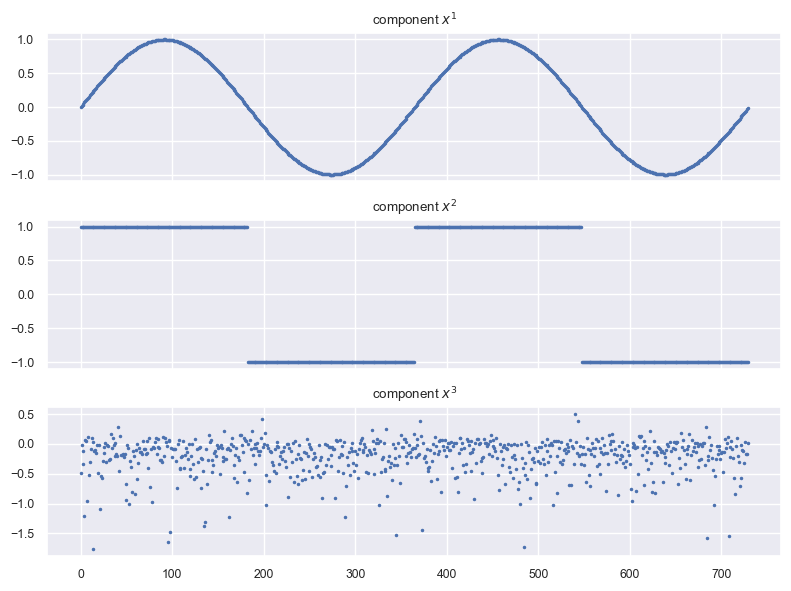

In [2]:
t = np.arange(365*2)

# seasonal term
signal1 = np.sin(2 * np.pi * t * 1 / (365.))
# piecewise constant term
signal2 = signal.square(2 * np.pi * t * 1 / (365.))
# asymmetric laplace noise 
kappa = 2 # k>0, k=1 is laplace
signal3 = 0.15 * laplace_asymmetric.rvs(kappa, size=len(signal1))

X_real = np.zeros((3, len(t)), dtype=float)
X_real[0] = signal1
X_real[1] = signal2
X_real[2] = signal3
y = np.sum(X_real, axis=0)

plot_decomp(X_real)

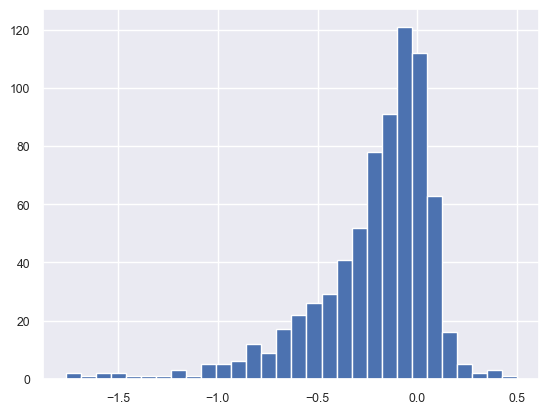

In [3]:
plt.hist(signal3, bins=30);

In [4]:
np.quantile(signal3, .8) # want this to be around 0

0.006092775222533824

### `test_tl1_l1d1_l2d2p365_default`

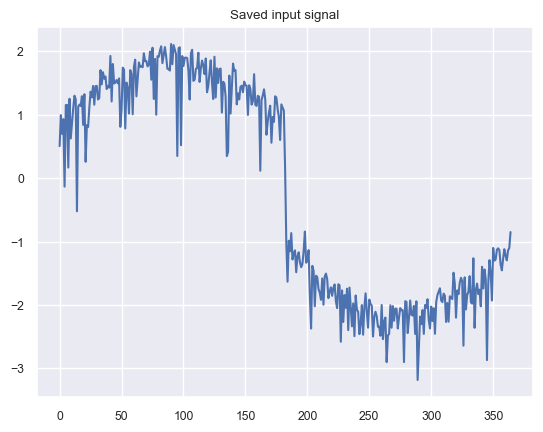

In [5]:
# Take signal <365 for this test
signal_365 = y[:365]
X_real_365 = [x[:365] for x in X_real]
input_dict = {
    "test_signal": list(signal_365)
}

with open("test_tl1_l1d1_l2d2p365_default_input.json", "w") as outfile:
    json.dump(input_dict, outfile)

plt.plot(signal_365);
plt.title("Saved input signal");

### Note:
- tau changed from 0.995 to 0.8
- c1 changed from 1000 to 5
- c2 from 100 to 500

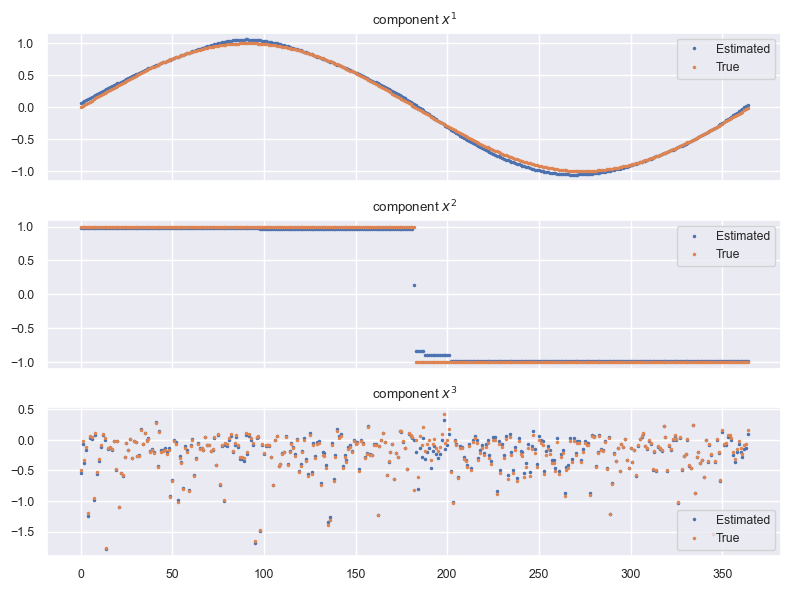

In [31]:
# c1 is tilted l1 param
s_hat, s_seas, s_error, s_linear, obj_val = sd.tl1_l1d1_l2d2p365(signal_365, tau=0.8, c1=5, c2=500, c3=100, solver = "MOSEK", return_obj=True)

output_dict = {
    "expected_s_hat_mosek_365": list(s_hat),
    "expected_s_seas_mosek_365": list(s_seas),
    "expected_obj_val_mosek_365": obj_val
}

with open("test_tl1_l1d1_l2d2p365_default_output.json", "w") as outfile:
    json.dump(output_dict, outfile)
    
plot_decomp([s_seas, s_hat, s_error], X_real_365)

### `test_tl1_l1d1_l2d2p365_idx_select`

### Note
- tau changed from 0.995 to 0.8
- c1 changed from 1000 to 5
- c2 changed from 100 to 500

In [6]:
# Taking full length signal
signal_730 = y

# Take a random set of 500 indices
rand_set = random.sample(range(0, 730), 500)
indices = [True if i in rand_set else False for i in range(len(signal_730))]

## input
input_dict = {
    "test_signal": list(signal_730),
    "indices": list(indices)
}

with open("test_tl1_l1d1_l2d2p365_idx_select_input.json", "w") as outfile:
    json.dump(input_dict, outfile)

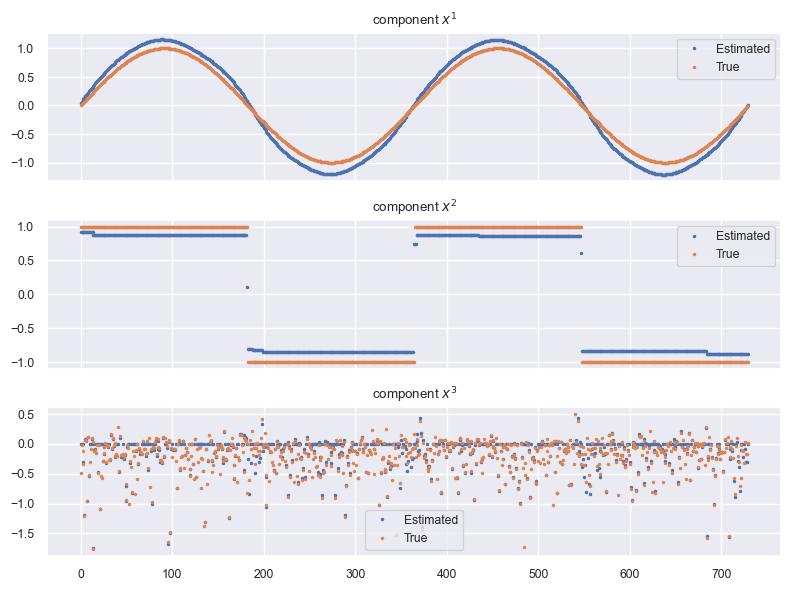

In [7]:
s_hat, s_seas, s_error, _, obj_val = sd.tl1_l1d1_l2d2p365(signal_730, 
                                                          solver = "MOSEK",
                                                          tau=0.8, 
                                                          c1=5, 
                                                          c2=500,
                                                          c3=100,
                                                          use_ixs=indices, 
                                                          return_obj=True
                                                         )


output_dict = {
    "expected_s_hat_mosek_ixs": list(s_hat),
    "expected_s_seas_mosek_ixs": list(s_seas),
    "expected_obj_val_mosek_ixs": obj_val
}

with open("test_tl1_l1d1_l2d2p365_idx_select_output.json", "w") as outfile:
    json.dump(output_dict, outfile)
    

plot_decomp([s_seas, s_hat, s_error], X_real)

### `test_tl1_l1d1_l2d2p365_tv_weights`

In [8]:
# Generate random weights 
rand_tv_weights = np.random.uniform(1, 2, len(signal_365)-1).round(7)

input_dict = {
    "test_signal": list(signal_365),
    "rand_tv_weights_365": list(rand_tv_weights)
}

with open("test_tl1_l1d1_l2d2p365_tv_weights_input.json", "w") as outfile:
    json.dump(input_dict, outfile)

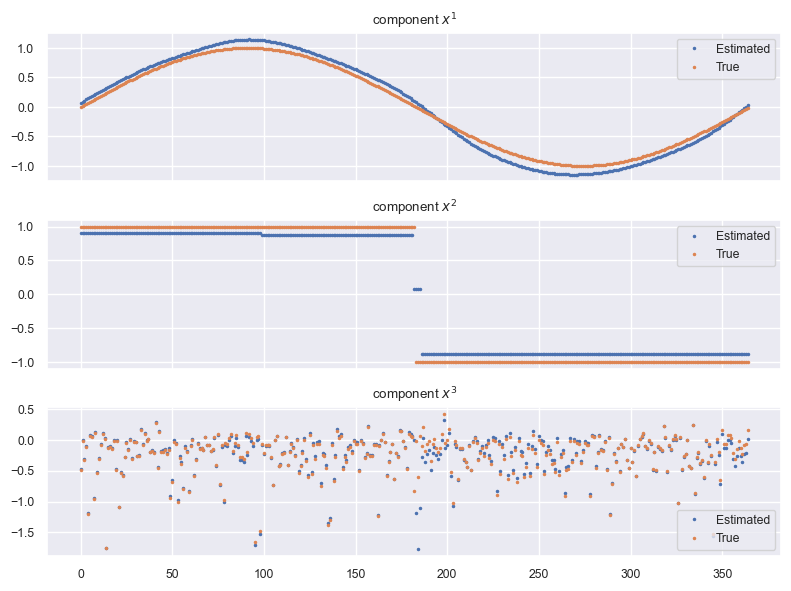

In [9]:
s_hat, s_seas, s_error, _, obj_val = sd.tl1_l1d1_l2d2p365(signal_365, 
                                              tau=0.8,
                                              c1=5,
                                              c2=500,
                                              c3=100,
                                              solver = "MOSEK",
                                              return_obj=True,
                                              tv_weights=rand_tv_weights
                                                         )
output_dict = {
    "expected_s_hat_mosek_tvw_365": list(s_hat),
    "expected_s_seas_mosek_tvw_365": list(s_seas),
    "expected_obj_val_mosek_tvw_365": obj_val
}

with open("test_tl1_l1d1_l2d2p365_tv_weights_output.json", "w") as outfile:
    json.dump(output_dict, outfile)
plot_decomp([s_seas, s_hat, s_error], X_real_365)